In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

bandits = 10
qt_a_f = np.random.randn(bandits,1)

# Stationary: Simple Bandit Problem

In [2]:
alpha = 0.1
bandits = 10
epsilon = 0.1
runs = 2000
steps = 10000

e_reward2_5_s = np.zeros((steps, 1))
poa2_5_s = np.zeros((steps,1))

ns = False

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1))
    for i in range(steps):
        x = np.random.rand()
        if x > epsilon:
            a_t = np.argmax(theta_a)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])
        else:
            a_t = np.random.randint(0,bandits)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_5_s[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_5_s[i] += 1

e_reward2_5_s = e_reward2_5_s / runs
poa2_5_s = poa2_5_s / runs

100%|██████████| 2000/2000 [04:41<00:00,  7.22it/s]


# Excercise 2.5

### Case: Updated Count

In [3]:
alpha = 0.1
bandits = 10
epsilon = 0.1
runs = 2000
steps = 10000

e_reward2_5_nsc = np.zeros((steps, 1))
poa2_5_nsc = np.zeros((steps,1))

ns = True


for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1))
    count_a = np.zeros((bandits,1))
    for i in range(steps):
        x = np.random.rand()
        if x > epsilon:
            a_t = np.argmax(theta_a)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + (1 / (count_a[a_t] + 1e-4)) * (r_t - theta_a[a_t])
        else:
            a_t = np.random.randint(0,bandits)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + (1 / (count_a[a_t] + 1e-4)) * (r_t - theta_a[a_t])
        count_a[a_t] += 1

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_5_nsc[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_5_nsc[i] += 1

e_reward2_5_nsc = e_reward2_5_nsc / runs
poa2_5_nsc = poa2_5_nsc / runs

100%|██████████| 2000/2000 [09:17<00:00,  3.61it/s]


### Case: Constant alpha

In [4]:
alpha = 0.1
bandits = 10
epsilon = 0.1
runs = 2000
steps = 10000

e_reward2_5_ns = np.zeros((steps, 1))
poa2_5_ns = np.zeros((steps,1))

ns = True

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1))
    for i in range(steps):
        x = np.random.rand()
        if x > epsilon:
            a_t = np.argmax(theta_a)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])
        else:
            a_t = np.random.randint(0,bandits)
            r_t = np.random.randn() + qt_a[a_t]
            theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_5_ns[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_5_ns[i] += 1

e_reward2_5_ns = e_reward2_5_ns / runs
poa2_5_ns = poa2_5_ns / runs

100%|██████████| 2000/2000 [07:18<00:00,  4.57it/s]


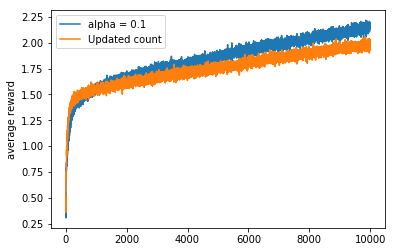

In [5]:
# Plot for average reward
plt.plot(e_reward2_5_ns, label='alpha = 0.1')
plt.plot(e_reward2_5_nsc, label='Updated count')
plt.ylabel('average reward')
plt.legend()
plt.show()

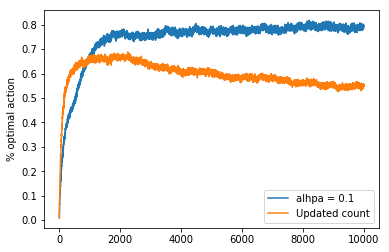

In [6]:
# Plot for percentage optimal action
plt.plot(poa2_5_ns, label='alhpa = 0.1')
plt.plot(poa2_5_nsc, label='Updated count')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

# Figure 2.3

### Case: Stationary

In [7]:
alpha = 0.1
bandits = 10
runs = 2000
steps = 10000

e_reward2_3_s = np.zeros((steps, 1))
poa2_3_s = np.zeros((steps,1))

ns = False

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1)) + 5
    for i in range(steps):
        a_t = np.argmax(theta_a)
        r_t = np.random.randn() + qt_a[a_t]
        theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_3_s[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_3_s[i] += 1

e_reward2_3_s = e_reward2_3_s / runs
poa2_3_s = poa2_3_s / runs

100%|██████████| 2000/2000 [04:25<00:00,  7.61it/s]


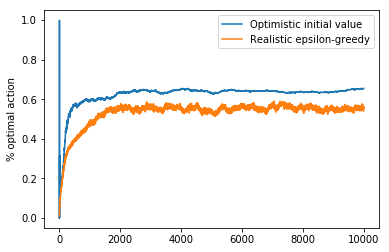

In [8]:
# Plot for percentage optimal action
plt.plot(poa2_3_s, label='Optimistic initial value')
plt.plot(poa2_5_s, label='Realistic epsilon-greedy')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

### Case: Non- Stationary

In [9]:
alpha = 0.1
bandits = 10
runs = 2000
steps = 10000

e_reward2_3_ns = np.zeros((steps, 1))
poa2_3_ns = np.zeros((steps,1))

ns = True

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1)) + 5
    for i in range(steps):
        a_t = np.argmax(theta_a)
        r_t = np.random.randn() + qt_a[a_t]
        theta_a[a_t] = theta_a[a_t] + alpha * (r_t - theta_a[a_t])

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_3_ns[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_3_ns[i] += 1

e_reward2_3_ns = e_reward2_3_ns / runs
poa2_3_ns = poa2_3_ns / runs

100%|██████████| 2000/2000 [07:00<00:00,  4.77it/s]


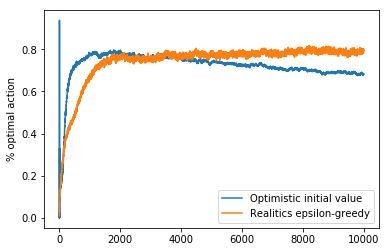

In [10]:
# Plot for percentage optimal action
plt.plot(poa2_3_ns, label='Optimistic initial value')
plt.plot(poa2_5_ns, label='Realitics epsilon-greedy')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

# Observations for Figure 2.3 with non-stationarity

After the spikes and oscillations in case of optimistic value intitialiation stop, initially it has greater percentage for selection of optimal action but after large number of steps epsilon greedy overtakes optimistic value intialization. It can be because epsilon greedy after very large number of steps learns the probability distribution __q*(a)__ very well in spite of non-stationarity.

# Exercise 2.6

**Why are there spikes and oscillations?**

There are spikes and oscillations in the early part of the graphs because initially, the predcited distribtion(__Q(a)__) is initialized to be much larger than the actual distributions of the bandits(__q*(a)__). Let us assume there are 10 bandits then for the first ten steps in each of the 2000 runs we will select the optimal action only once. Now each of the __Q(a)__ have been updated but the update term __alpha * (reward - Q(a))__ is small so still the update __Q(a)__ is much larger than __q*(a)__. Once we have sufficiently explored the spikes reduce and we see a behaviour similar to epsilon greedy.

Overall the method initially performs worse than simple epsilon greedy method but after sufficient exploration in small number of steps it's performance improves


# Exercise 2.7

$$
o_n = o_{n-1} + \alpha * (1 - o_{n-1}), \qquad \beta_n = \frac{\alpha}{o_n}, \quad o_0 = 0
$$
This is given and we need to show that $Q_n$ has no center bias

$$
Q_{n+1} = Q_n + \beta_n (R_n - Q_n) \\
Q_{n+1} = \beta_n R_n + (1 - \beta_n) Q_n \\
Q_{n+1} = \beta_n R_n + \frac{o_n - \alpha}{o_n} Q_n \\
Q_{n+1} = \beta_n R_n + \frac{o_{n-1} + \alpha - \alpha o_{n-1} - \alpha}{o_n} Q_n \\
Q_{n+1} = \beta_n R_n + \frac{o_{n-1} (1 - \alpha)}{o_n} Q_n \qquad (1) \\ 
Q_{n} = \beta_{n-1} R_{n-1} + \frac{o_{n-2} * (1 - \alpha)}{o_{n-1}} Q_{n-1} \qquad (2) \\ \\
Q_{n+1} = \beta_n R_n + \frac{o_{n-1} (1 - \alpha)}{o_n} (\beta_{n-1} R_{n-1} + \frac{o_{n-2} (1 - \alpha)}{o_{n-1}} Q_{n-1}) \\
Q_{n+1} = \beta_n R_n + \frac{o_{n-1} (1 - \alpha)}{o_n} \beta_{n-1} R_{n-1} + \frac{o_{n-2} (1 - \alpha)^2}{o_{n}} Q_{n-1}) \\
Q_{n+1} = \Sigma_{i=1}^{n} (\beta_{n-i} (\frac{o_{n-i}}{o_n}) (1-\alpha)^{i} R_{n-i}) + \frac{o_1}{o_n}(1 - \alpha)^nQ_1 \\
\implies Q_{n+1} = \Sigma_{i=1}^{n} (\beta_{n-i} (\frac{o_{n-i}}{o_n}) (1-\alpha)^{i} R_{n-i})
$$
Since it does not depend on $Q_1$ therefore $Q_n$ is an exponential recency-weighted average without initial bias.

# Compare UCB to Optimistic Value and e-greedy for both Stationary & Non-Stationary case

### Case: Stationary

In [11]:
c = 2
alpha = 0.1
runs = 2000
bandits = 10
steps = 10000

e_reward2_7_s = np.zeros((steps, 1))
poa2_7_s = np.zeros((steps,1))

ns = False

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1)) 
    count_a = np.zeros((bandits,1))
    for i in range(steps):
        temp = np.reciprocal((count_a + 1.0e-4) / np.log(steps + 1))
        a_t = np.argmax(theta_a + c * np.sqrt(temp))
        r_t = np.random.randn() + qt_a[a_t]
        theta_a[a_t] = theta_a[a_t] + (1 / (count_a[a_t] + 1.0e-4)) * (r_t - theta_a[a_t])
        count_a[a_t] += 1

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_7_s[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_7_s[i] += 1

e_reward2_7_s = e_reward2_7_s/ runs
poa2_7_s = poa2_7_s / runs

100%|██████████| 2000/2000 [09:08<00:00,  3.59it/s]


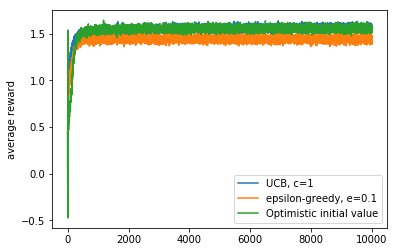

In [15]:
# Plot for average reward
plt.plot(e_reward2_7_s, label='UCB, c=1')
plt.plot(e_reward2_5_s, label='epsilon-greedy, e=0.1')
plt.plot(e_reward2_3_s, label='Optimistic initial value')
plt.legend()
plt.ylabel('average reward')
plt.show()

### Case: Non-stationary

In [13]:
c = 2
alpha = 0.1
runs = 2000
bandits = 10
steps = 10000

e_reward2_7_ns = np.zeros((steps, 1))
poa2_7_ns = np.zeros((steps,1))

ns = True

for j in tqdm.trange(runs):
    qt_a = np.copy(qt_a_f)
    theta_a = np.zeros((bandits,1)) 
    count_a = np.zeros((bandits,1))
    for i in range(steps):
        temp = np.reciprocal((count_a + 1.0e-4) / np.log(steps + 1))
        a_t = np.argmax(theta_a + c * np.sqrt(temp))
        r_t = np.random.randn() + qt_a[a_t]
        theta_a[a_t] = theta_a[a_t] + (1 / (count_a[a_t] + 1.0e-4)) * (r_t - theta_a[a_t])
        count_a[a_t] += 1

        # Adding non-stationarity
        if ns == True:
            non_s = np.random.normal(0, 0.01, bandits)
            non_s = non_s.reshape((bandits,1))
            qt_a += non_s
        
        # Update reward for ith step
        e_reward2_7_ns[i] += r_t
        
        # Update percentage optimal action
        optimal_action = np.argmax(qt_a)
        if a_t == optimal_action:
            poa2_7_ns[i] += 1

e_reward2_7_ns = e_reward2_7_ns/ runs
poa2_7_ns = poa2_7_ns / runs

100%|██████████| 2000/2000 [12:04<00:00,  2.76it/s]


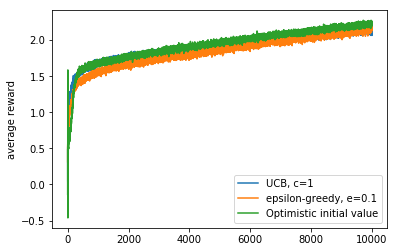

In [16]:
# Plot for average reward
plt.plot(e_reward2_7_ns, label='UCB, c=1')
plt.plot(e_reward2_5_ns, label='epsilon-greedy, e=0.1')
plt.plot(e_reward2_3_ns, label='Optimistic initial value')
plt.legend()
plt.ylabel('average reward')
plt.show()